In [2]:
from MMfunc import *
from Profiling import profile
# import numpy as np
# import bisect
# from num/ba import jit

In [3]:
Matrixes = generateSymetryBase()

In [4]:
'''Sfaleryt'''
koordynaty = np.array([[0,0,0],[0,0,1],[0,1,0],[1,1,0],[1,0,0],[1,1,1],[1,0,1],[0,1,1],
              [0.5,0.5,0],[0.5,0,0.5],[0,0.5,0.5],[0.5,0.5,1],[0.5,1,0.5],[1,0.5,0.5],
             [0.75,0.25,0.25],[0.25,0.75,0.25],[0.25,0.25,0.75],[0.75,0.75,0.75]])

koordynatyprob = np.array([[0,0,0],[0,0,1],[0,1,0],[1,1,0],[1,0,0],[1,1,1],[1,0,1],[0,1,1]])
# print(koordynaty)

'''slownik_operacji_minus43m = {"-4":Matrixes["-4"],
                             "-3":Matrixes["3"][1:]}
print(slownik_operacji_minus43m)
#print(koordynaty)'''
None

In [5]:
oski = [Matrixes["m"][os] for os in Matrixes["m"]][3:] 
oski2 =  [Matrixes["-4"][os] for os in Matrixes["-4"]] + [Matrixes["3"][os] for os in Matrixes["3"]][1:]

komorka = supercell(koordynaty, size = 2)
mojalista1 = usunkoor(komorka, oski + oski2) 
# print(komorka)
# print(len(mojalista1))
# for nr,el in enumerate(komorka):
#     print(nr,el)
# %timeit usunkoor(komorka, oski+ oski2)

In [54]:
#bez uwzglednienia usunkoor
n = 14
#while n < len(komorka):      
komorkabez = np.append(komorka[:n],komorka[n+1:],axis = 0)
print(n, komorka[n],end='\n\n')

mozliwosci = findAntiSym_MOD(komorkabez, komorka[n])
print(mozliwosci,end='\n\n')

print(findSym_Base_mod2(komorkabez, makelist()),end='\n\n')

14 [-0.75 -0.75  0.75]

[('-6', '001'), ('-3', '11-1'), ('-3', '001'), ('3', '11-1'), ('3', '001'), ('2', '0-11'), ('2', '-101'), ('2', '-110'), ('2', '011'), ('2', '101'), ('2', '110'), ('m', '-110'), ('m', '011'), ('m', '001'), ('m', '010'), ('m', '100'), ('c', '000')]

[('3', '11-1'), ('m', '-110'), ('m', '011')]



In [13]:
%timeit findAntiSym_MOD(komorkabez, komorka[n])
%timeit findSym_Base_mod2(komorkabez, mozliwosci)

6.36 ms ± 21.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
73.9 ms ± 155 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
fdhfhf

In [8]:
os = [0,0]
os[0] = Matrixes["3"]["001"]
os[1] = Matrixes["-4"]["010"]
np.dot(np.array([-1,-1,-1]),os[0])

array([-0.3660254,  1.3660254, -1.       ])

In [ ]:
os = [0]*5
os[0] = Matrixes["-4"]["001"]
os[1] = Matrixes["2"]["010"]
os[2] = np.dot(os[0],os[1])
os[3] = np.dot(os[0],os[2])
os[4] = np.dot(os[0],os[3])


'''print("-4 001",os[0],sep='\n',end='\n\n')
print("2 010",os[1],sep='\n',end='\n\n')
print("m -110",os[2],sep='\n',end='\n\n')
print('2 100',os[3],sep='\n',end='\n\n')'''
print('m 110',os[4],sep='\n',end='\n\n')

In [ ]:
"""Az4Ay4""" 
os = [Matrixes["-4"]["001"],Matrixes["-4"]["010"]]
os1 = [Matrixes["4"]["001"],Matrixes["4"]["010"],Matrixes["c"]["000"]]
os2 = [Matrixes["2"]["001"],Matrixes["2"]["010"],Matrixes["c"]["000"]]

lolo = makeithappen(os1)

np.linalg.inv()
print(len(lolo))
for punkt in lolo:
    print(punkt,end='\n\n')

In [ ]:
np.linalg.inv(lolo[numer])

In [ ]:
numer = 4
print(np.dot(lolo[numer],lolo[numer]))
print(listadous(lolo[numer], np.array([1,1,0]),4))

In [ ]:
    
    
for nr, oska in enumerate(os[2:]):
    os[nr+2] = np.dot(os[0],os[nr+1])
    if os[nr+2] in os[:nr+1]:
        pass
    
        
        
for oska in os:
    print(oska,end='\n\n')
'''print("-4 001",os[0],sep='\n',end='\n\n')
print("-4 010",os[1],sep='\n',end='\n\n')
print("3 -111",os[2],sep='\n',end='\n\n')
print('3 111',os[3],sep='\n',end='\n\n')
print('m -101',os[4],sep='\n',end='\n\n')
print("m 011",os[5],sep='\n',end='\n\n')
print("-4 010",os[6],sep='\n',end='\n\n')
print("3 -111",os[7],sep='\n',end='\n\n')'''
None

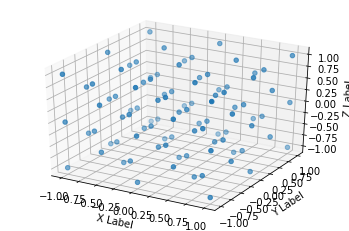

In [31]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#for c, m in [('r', 'o'), ('b', '^')]:
mojalista2 = komorka.T
xs = mojalista2[0]
ys = mojalista2[1]
zs = mojalista2[2]
ax.scatter(xs, ys, zs)#, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [275]:
def usunkoormod(koorZEW, oski):
    koorWEW = koorZEW.copy()
    koorWEWT = koorWEW.T
    for os in oski:
        j = 0
        while j < len(koorWEW):            
            for punktdous in listadous2(os, koorWEW[j]):                
                i = findindex(punktdous, koorWEWT[:,j+1:])
                if i + 1:
#                     print(punktdous,"dous")
#                     print(koorWEWT[:,i+j],"usuwany")
                    koorWEWT = np.delete(koorWEWT, i+j, 1)
                    koorWEW = np.delete(koorWEW, i+j, 0)
            j += 1
    return koorWEW
usunkoormod(komorka, oski + oski2) 

array([[-1.  , -1.  , -1.  ],
       [-1.  ,  1.  ,  1.  ],
       [-0.75, -0.75, -0.25],
       [-0.75,  0.75,  0.25],
       [-0.5 , -0.5 , -1.  ],
       [-0.5 ,  1.  ,  0.5 ],
       [-0.25,  0.25, -0.75],
       [-0.25,  0.25,  0.25],
       [-0.25,  0.75,  0.75],
       [ 0.  , -1.  , -1.  ],
       [ 0.  , -0.5 ,  0.5 ],
       [ 0.  ,  0.  ,  1.  ],
       [ 0.  ,  1.  ,  1.  ],
       [ 0.25, -0.75,  0.75],
       [ 0.5 , -0.5 , -1.  ],
       [ 0.5 ,  0.5 ,  1.  ],
       [ 0.75,  0.25,  0.25],
       [ 1.  ,  0.  ,  1.  ],
       [ 1.  ,  1.  ,  1.  ]])

In [257]:
def usunkoor(koorZEW, oski):
    koorWEW = koorZEW.copy().tolist() # sprawdzic
    for os in oski:
        j = 0 
        while j < len(koorWEW):            
            for punktdous in listadous2(os, koorWEW[j]):#,myswitch("m")):
                try:
                    i = koorWEW[j+1:].index(punktdous.tolist())
                    del koorWEW[i+j+1]      
                except:
                    pass            
            j += 1
    return np.array(koorWEW)#np.unique(koorWEW,axis = 0) 
%timeit usunkoor(komorka, oski + oski2) 

35.1 ms ± 208 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [256]:
%timeit usunkoor(komorka, oski + oski2) 
%timeit usunkoormod(komorka, oski + oski2) 

35 ms ± 369 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
82.4 ms ± 578 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
komorkal = komorka.tolist()
%timeit komorkal.index(np.array([1,1,0]).tolist())

6.52 µs ± 40.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
